# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling resort revenue. The data you started with contained some ticket price values, but with a number of missing values that led to several rows being dropped completely. You also had two kinds of ticket price. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional US state population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to predict the adult weekend ticket price for ski resorts.

## 3.3 Imports<a id='3.3_Imports'></a>

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from empiricaldist import Pmf
from empiricaldist import Cdf
import statsmodels.formula.api as smf

from scipy.stats import linregress


In [14]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [15]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('C:\\Users\\Admin/ski_resort_data.csv')

In [16]:
#datapath = 'path/data'
ski_data.to_csv('C:\\Users\\Admin/ski_data_cleaned_v1.csv', index = False)

In [17]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [18]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [19]:

state_summary = pd.read_csv('C:\\Users\\Admin/state_summary_v1.csv')

In [20]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [21]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


In [22]:
state_summary_newind = state_summary.set_index('state')

In [23]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

In [24]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

In [25]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

In [26]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

In [27]:
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ac, dtype: float64

In [28]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

In [29]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


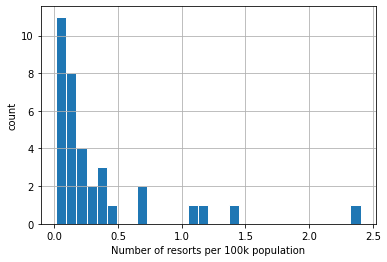

In [30]:
state_summary.resorts_per_100kcapita.hist(bins=30, edgecolor='white')
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

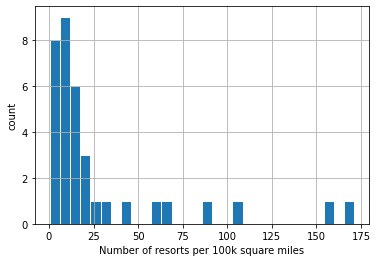

In [31]:
state_summary.resorts_per_100ksq_mile.hist(bins=30, edgecolor='white')
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

In [32]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [33]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

In [34]:
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('state')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [35]:
state_summary_scale = scale(state_summary_scale)

In [36]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


In [37]:
state_summary_scaled_df.shape

(35, 7)

In [38]:
state_summary_scaled_df

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408
5,0.332897,1.021846,0.262915,0.208804,-0.184933,0.675426,-0.349944
6,-0.680267,-0.601246,-0.838294,-0.726994,-0.530222,-0.636324,-0.532156
7,-0.933558,-0.603850,-0.915319,-0.816118,-0.570301,-0.640133,-0.566759
8,-0.806912,-0.606354,-0.983919,-0.771556,-0.608837,-0.506120,-0.570679
9,-0.047040,-0.298262,-0.063236,-0.236814,-0.226552,0.671418,-0.079076


In [39]:
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

resorts_per_state             -6.344132e-17
state_total_skiable_area_ac   -5.432163e-17
state_total_days_open          9.754102e-17
state_total_terrain_parks      4.282289e-17
state_total_nightskiing_ac     6.344132e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        5.075305e-17
dtype: float64

In [40]:
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

In [41]:
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

In [42]:
state_pca = PCA().fit(state_summary_scale)

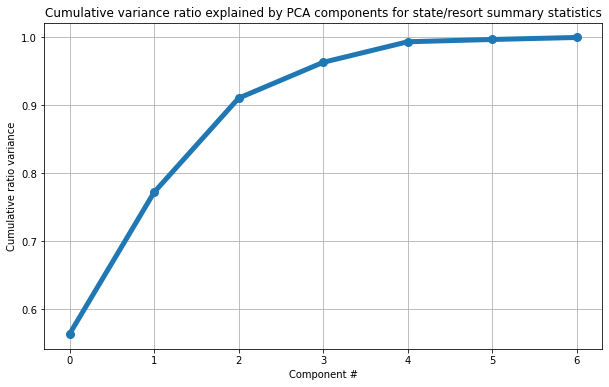

In [43]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum(), linewidth=5, marker='o', markersize=8)
plt.grid(True)
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [44]:
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [45]:
state_pca_x.shape

(35, 7)

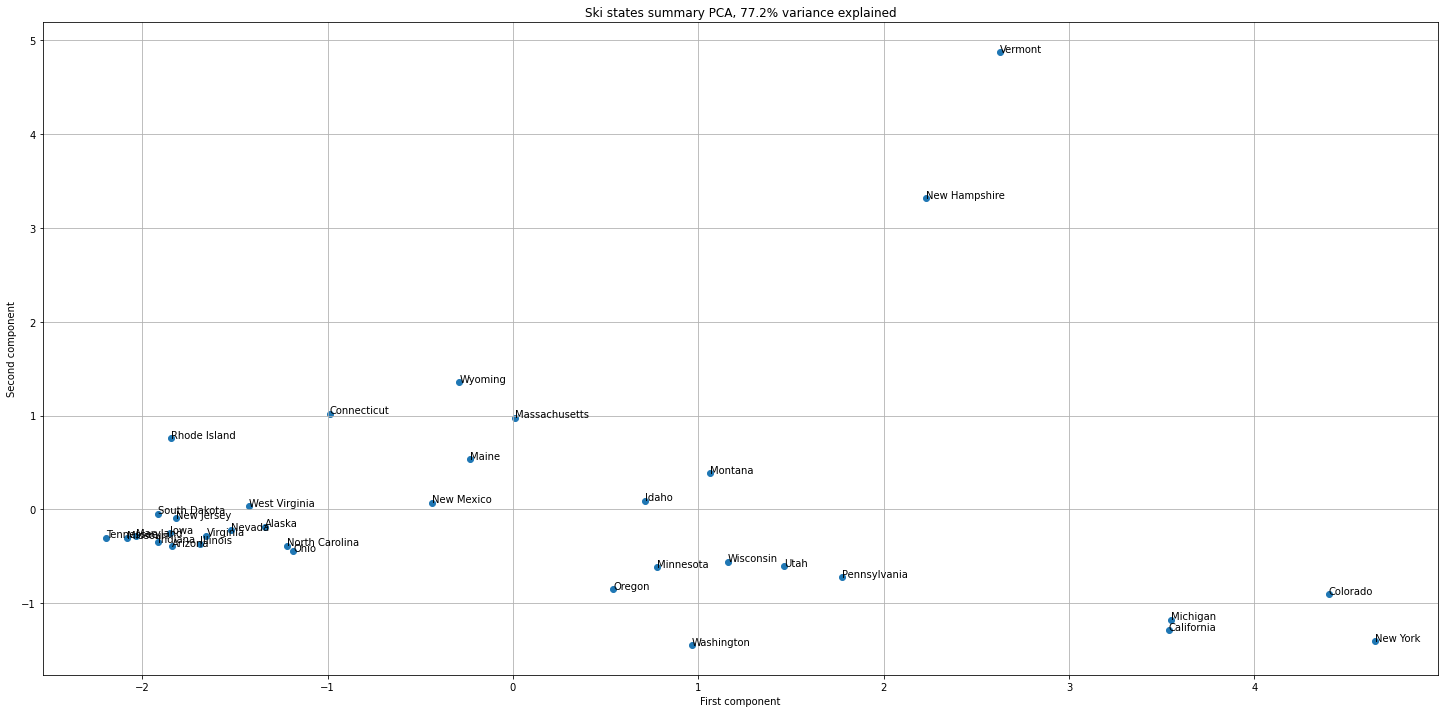

In [46]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(25,12))
plt.scatter(x=x, y=y)
plt.grid(True)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

In [47]:
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

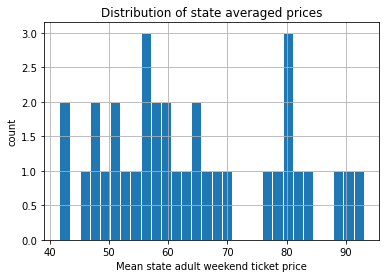

In [48]:
state_avg_price.hist(bins=30, edgecolor='white')
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

In [49]:
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.336533,-0.182208
Arizona,-1.839049,-0.387959
California,3.537857,-1.282509
Colorado,4.402210,-0.898855
Connecticut,-0.988027,1.020218


In [50]:
# our average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [51]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [52]:
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.336533,-0.182208,57.333333
Arizona,-1.839049,-0.387959,83.500000
California,3.537857,-1.282509,81.416667
Colorado,4.402210,-0.898855,90.714286
Connecticut,-0.988027,1.020218,56.800000


In [53]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.336533,-0.182208,57.333333,"(53.0, 60.4]"
Arizona,-1.839049,-0.387959,83.500000,"(78.4, 93.0]"
California,3.537857,-1.282509,81.416667,"(78.4, 93.0]"
Colorado,4.402210,-0.898855,90.714286,"(78.4, 93.0]"
Connecticut,-0.988027,1.020218,56.800000,"(53.0, 60.4]"


In [54]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

In [55]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.843646,0.761339,NaN,NaN


In [56]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

PC1            -1.843646
PC2             0.761339
AdultWeekend    64.10172
Quartile              NA
Name: Rhode Island, dtype: object

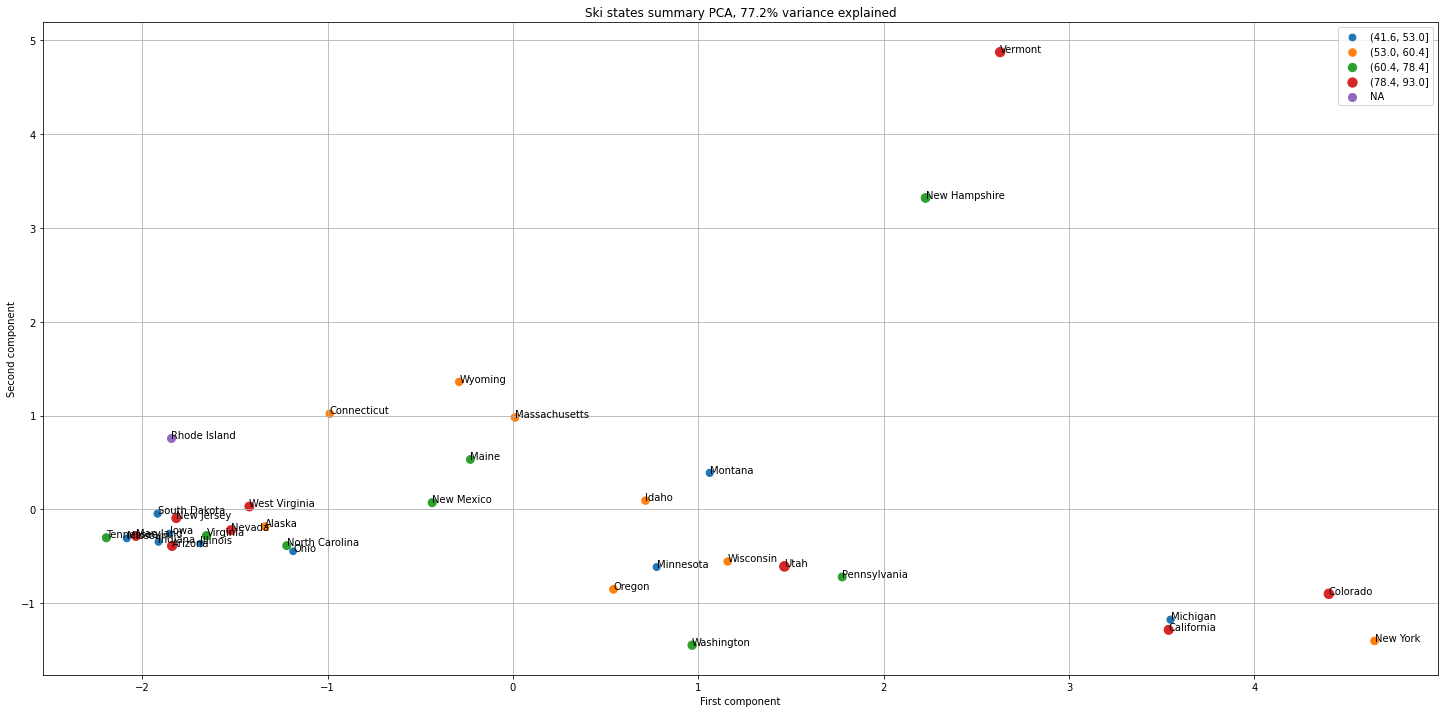

In [57]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(25,12))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
plt.grid(True)
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

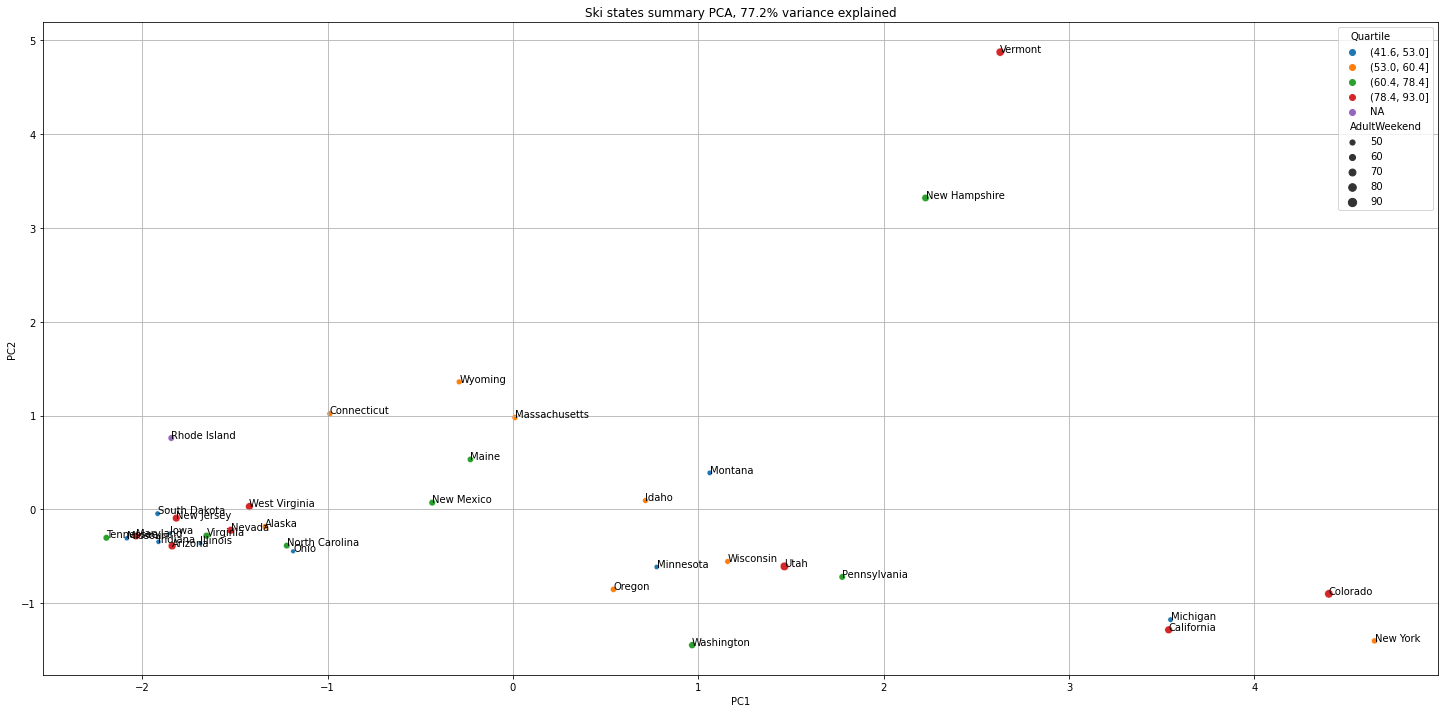

In [58]:
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(25, 12))
plt.grid(True)
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x='PC1', y='PC2', size='AdultWeekend', hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

In [59]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.486079,0.318224,0.489997,0.488420,0.334398,0.187154,0.192250
1,-0.085092,-0.142204,-0.045071,-0.041939,-0.351064,0.662458,0.637691
2,-0.177937,0.714835,0.115200,0.005509,-0.511255,0.220359,-0.366207
3,0.056163,-0.118347,-0.162625,-0.177072,0.438912,0.685417,-0.512443
4,-0.209186,0.573462,-0.250521,-0.388608,0.499801,-0.065077,0.399461
5,-0.818390,-0.092319,0.238198,0.448118,0.246196,0.058911,-0.009146
6,-0.090273,-0.127021,0.773728,-0.613576,0.022185,-0.007887,-0.005631


In [60]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [61]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.277128,0.104681
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.921793,1.233725
state_total_nightskiing_ac,-0.245050,-0.747570
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


In [62]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [63]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastEight,0.0,0.0,0.0,0.0,NaN
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1


In [64]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [65]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastEight,0.0,0.0,0.0,0.0,NaN
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1


In [66]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

In [67]:
ski_data.shape

(330, 34)

In [68]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                330 non-null    object 
 1   Region                              330 non-null    object 
 2   state                               330 non-null    object 
 3   summit_elev                         330 non-null    int64  
 4   vertical_drop                       330 non-null    int64  
 5   base_elev                           330 non-null    int64  
 6   trams                               330 non-null    int64  
 7   fastEight                           164 non-null    float64
 8   fastSixes                           330 non-null    int64  
 9   fastQuads                           330 non-null    int64  
 10  quad                                330 non-null    int64  
 11  triple                              330 non-n

In [69]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,AdultWeekend,projectedDaysOpen,NightSkiing_ac,resorts_per_state,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,85.0,150.0,550.0,3,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,53.0,90.0,NaN,3,0.410091,0.450867,0.280702,0.130435,0.250000,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,34.0,152.0,30.0,3,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,89.0,122.0,NaN,2,0.027477,1.754540,0.492708,0.514768,0.666667,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,78.0,104.0,80.0,2,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000


In [70]:
ski_data[ski_data['Name'] == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


In [71]:
ski_data[ski_data['Region'] == 'Montana'].T

,140,141,142,143,144,145,146,147,148,149,150,151
Name,Big Sky Resort,Blacktail Mountain Ski Area,Bridger Bowl,Discovery Ski Area,Great Divide,Lost Trail - Powder Mtn,Maverick Mountain,Montana Snowbowl,Red Lodge Mountain,Showdown Montana,Teton Pass Ski Resort,Big Mountain Resort
Region,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana
state,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana,Montana
summit_elev,11166,6676,8700,8150,7330,8200,8520,7600,9416,8200,7200,6817
vertical_drop,4350,1440,2600,2380,1580,1800,2020,2600,2400,1400,1010,2353
base_elev,7500,5236,6100,5770,5750,6400,6500,5000,7016,6800,6190,4464
trams,1,0,0,0,0,0,0,0,0,0,0,0
fastEight,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0
fastSixes,2,0,0,0,0,0,0,0,0,0,0,0
fastQuads,5,0,0,0,0,0,0,0,2,0,0,3


Text(0.5, 1.0, 'Correlations in ski_data')

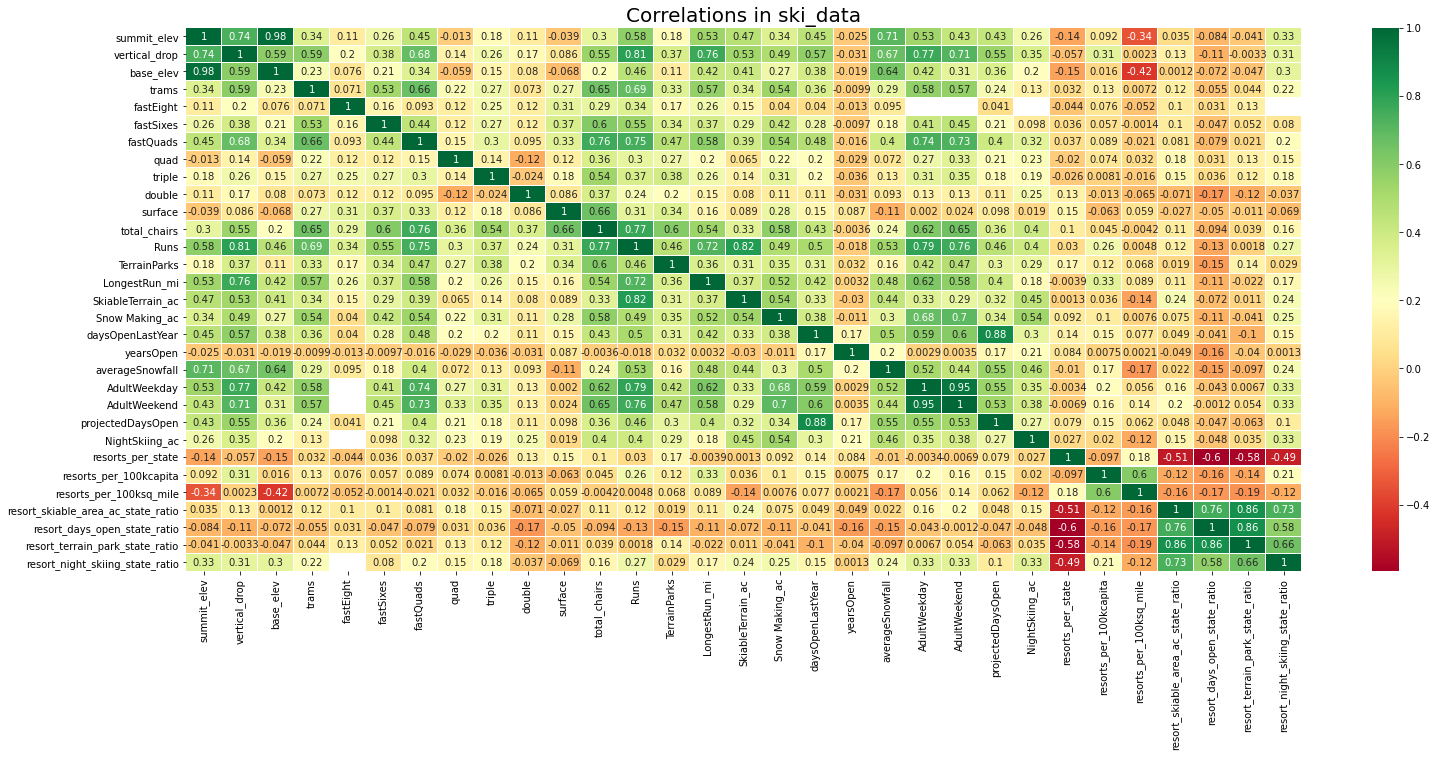

In [72]:
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(25,10))
# Using numpy ‘.tril()’ method to take the upper correlation matrix and mask attribute: to create an upper triangle matrix.
#matrix = np.tril(ski_data.corr())
#sns.heatmap(ski_data.corr(), linewidths=.1, annot=True, cmap='coolwarm', center=0, mask=matrix);
sns.heatmap(ski_data.corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Correlations in ski_data', fontsize=20)

Text(0.5, 1.0, 'Correlations between Ticket price vs. Main ')

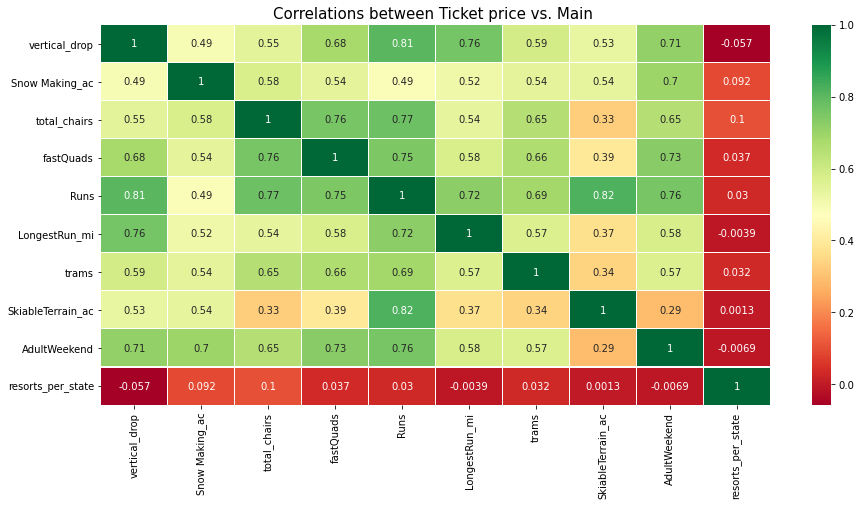

In [73]:
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(15,7))
# Using numpy ‘.tril()’ method to take the upper correlation matrix and mask attribute: to create an upper triangle matrix.
#matrix = np.tril(ski_data.corr())
#sns.heatmap(ski_data.corr(), linewidths=.1, annot=True, cmap='coolwarm', center=0, mask=matrix);
sns.heatmap(ski_data[['vertical_drop', 'Snow Making_ac', 'total_chairs', 'fastQuads', 'Runs', 'LongestRun_mi', 'trams', 'SkiableTerrain_ac', 'AdultWeekend', 'resorts_per_state']].corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Correlations between Ticket price vs. Main ', fontsize=15)

In [74]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(20, 12)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [75]:
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [x for x in ski_data.columns if x not in ['Name', 'Region', 'state', 'AdultWeekend']]

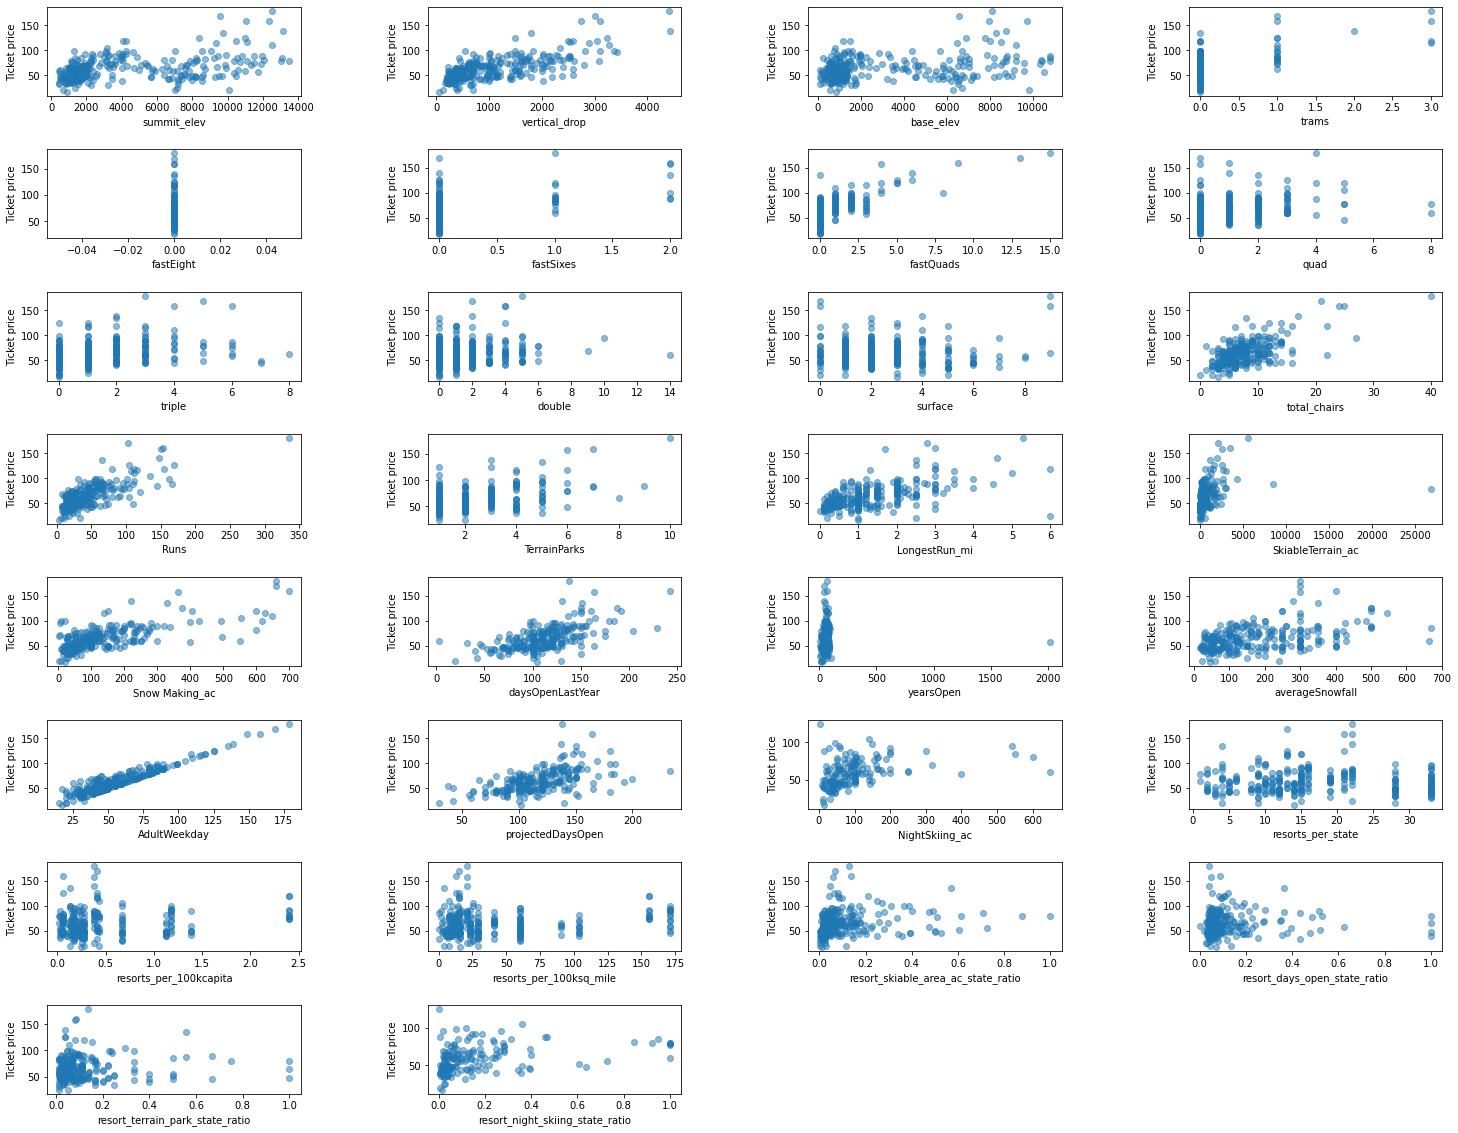

In [76]:
scatterplots(features, ncol=4, figsize=(25, 20))

In [77]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac
# Adding 'Runs_skiable_ratio':
ski_data['Runs_skiable_ratio'] = ski_data.Runs / ski_data.SkiableTerrain_ac

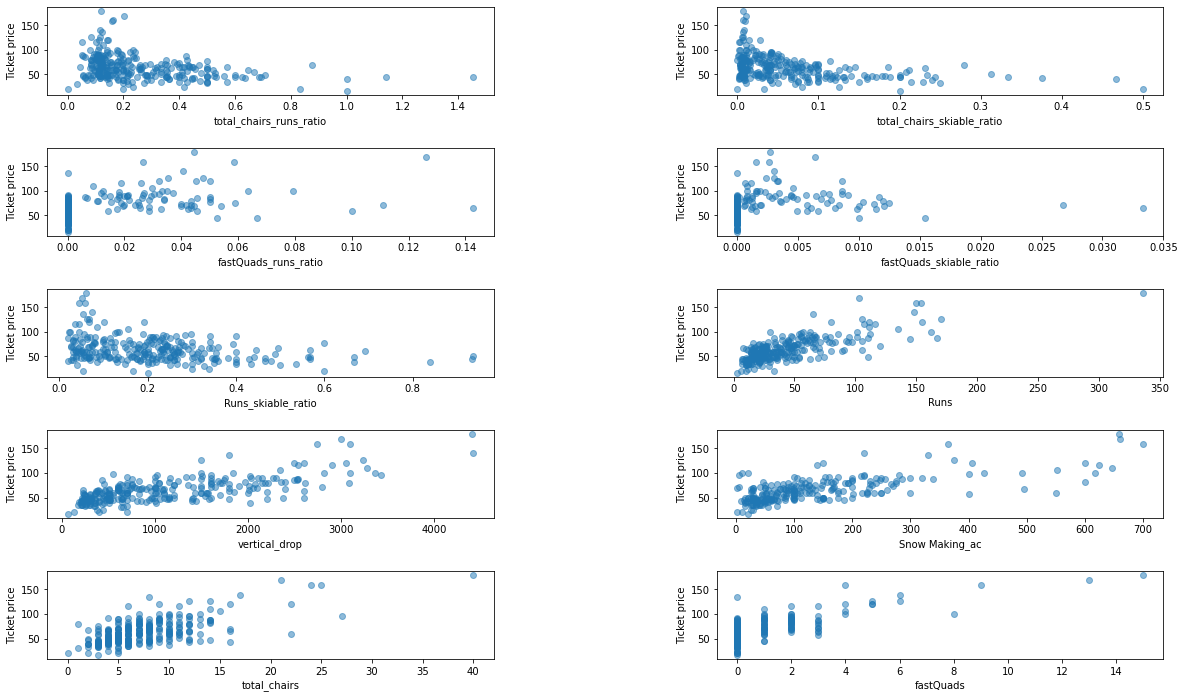

In [78]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio', 'Runs_skiable_ratio', 'Runs', 'vertical_drop', 'Snow Making_ac', 'total_chairs', 'fastQuads'], ncol=2)
plt.show()

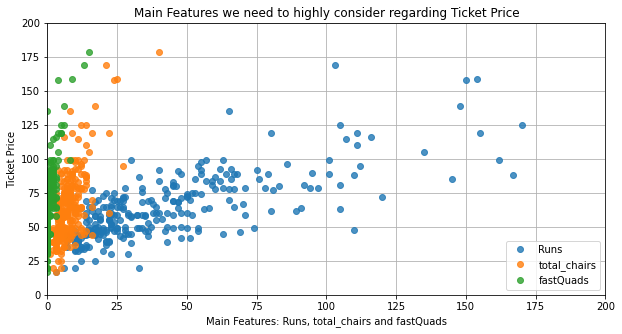

In [79]:
# find if there's any relation between'Runs', 'total_chairs', 'fastQuads' and Ticket price:
x = ski_data[['Runs', 'total_chairs', 'fastQuads']]
y = ski_data['AdultWeekend']
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', alpha=0.8)
plt.xlabel("Main Features: Runs, total_chairs and fastQuads")
plt.ylabel('Ticket Price')
plt.axis([0, 200, 0, 200])
plt.title('Main Features we need to highly consider regarding Ticket Price')
plt.legend(x)
plt.grid(True)

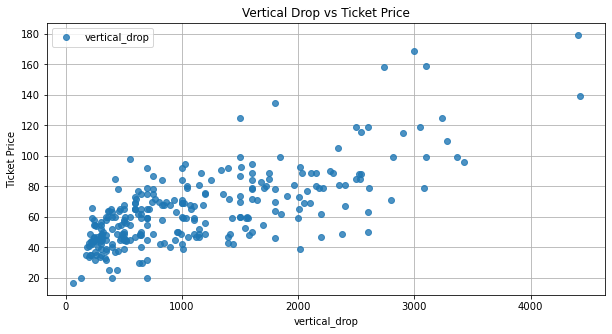

In [80]:
# find if there's any relation between 'vertical_drop' & Ticket price:
y = ski_data['AdultWeekend']
z = ski_data[['vertical_drop']]
plt.figure(figsize=(10, 5))
plt.plot(z, y, 'o', alpha=0.8)
plt.xlabel("vertical_drop")
plt.ylabel('Ticket Price')
plt.title('Vertical Drop vs Ticket Price')
plt.legend(z)
plt.grid(True)

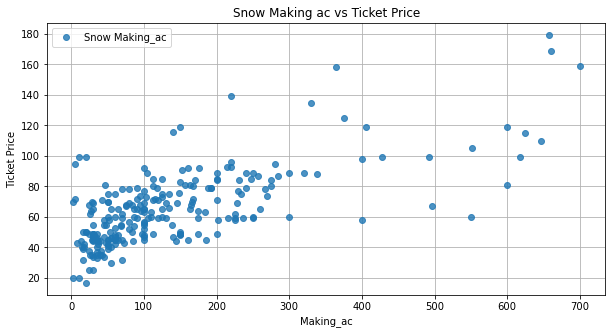

In [81]:
# find if there's any relation between 'Snow Making_ac' & Ticket price:
y = ski_data['AdultWeekend']
f = ski_data[['Snow Making_ac']]
plt.figure(figsize=(10, 5))
plt.plot(f, y, 'o', alpha=0.8)
plt.xlabel("Making_ac")
plt.ylabel('Ticket Price')
plt.title('Snow Making ac vs Ticket Price')
plt.legend(f)
plt.grid(True)

<ipython-input-83-50aac9fb6954>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax2 = ski_data.groupby('state')['AdultWeekend', 'averageSnowfall'].mean().plot(kind='bar', stacked=True, figsize=(15,4), rot=90, grid=True, title='Avg Ticket Price Per State per Snow Fall')


Text(0, 0.5, 'Avg Ticket Price/Snow Fall')

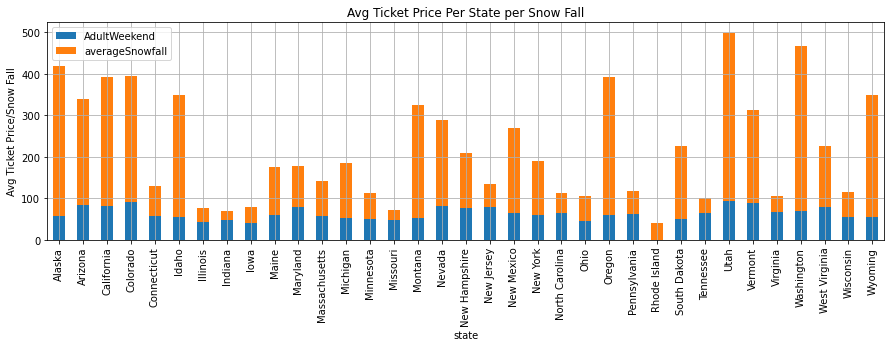

In [83]:
# find if there's any relation between State & Ticket price:
ax2 = ski_data.groupby('state')['AdultWeekend', 'averageSnowfall'].mean().plot(kind='bar', stacked=True, figsize=(15,4), rot=90, grid=True, title='Avg Ticket Price Per State per Snow Fall')
plt.ylabel('Avg Ticket Price/Snow Fall')

In [86]:
#Summary
#Q: 1 Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

#A: Exploratory data analysis Summary:
#What numerical or categorical features were in the data?

#Numerical features:

#resort_skiable_area_ac_state_ratio
#resort_days_open_state_ratio
#resort_night_skiing_state_ratio
#total_chairs_runs_ratio
#total_chairs_skiable_ratio
#fastQuads_runs_ratio
#fastQuads_skiable_ratio
#Runs_skiable_ratio
#Categorical features:

#resorts_per_state
#state_total_skiable_area_ac
#state_total_days_open_last_year
#state_total_night_skiing_ac
#resorts_per_100kcapita
#resorts_per_100ksq_mile


In [87]:
# Save the data 

ski_data.to_csv('ski_data_step3_features.csv', index = False)

In [88]:
#Extract Variables to build Linear regression between 'AdultWeekend' & 'Runs' :
subset = ski_data.dropna(subset=['AdultWeekend', 'Runs'])
xs = subset['Runs']
ys = subset['AdultWeekend']
#Compute the linear regression:
res = linregress(xs, ys)
res

LinregressResult(slope=0.49650129895130324, intercept=42.63562842883006, rvalue=0.7572660412063142, pvalue=1.2819790278781408e-52, stderr=0.02586906032361366, intercept_stderr=1.4836182212056988)

Text(0, 0.5, 'Ticket price')

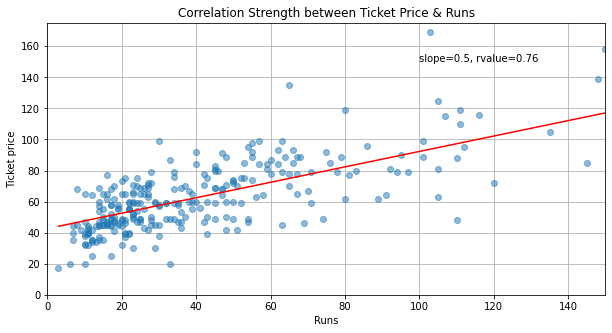

In [89]:
#Plot the Scatter Plot:
plt.figure(figsize=(10, 5))
plt.plot(xs, ys, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, 'r-', alpha=1)
plt.text(100, 150, "slope=0.5, rvalue=0.76")
plt.title('Correlation Strength between Ticket Price & Runs')

#zoom-in to avoid outliers:
plt.axis([0, 150, 0, 175])
plt.xlabel('Runs')
plt.ylabel('Ticket price')

In [90]:
#Extract Variables to build Linear regression between 'AdultWeekend' & 'total_chairs' :
xs_1 = ski_data['total_chairs']
ys_1 = ski_data['AdultWeekend']
#Compute the linear regression:
res_1 = linregress(xs_1, ys_1)
res_1

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

Text(0, 0.5, 'Ticket price')

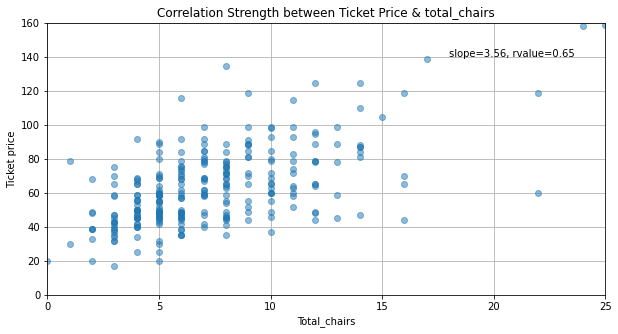

In [91]:
#Plot the Scatter Plot:
plt.figure(figsize=(10, 5))
plt.plot(xs_1, ys_1, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx_1 = np.array([xs_1.min(), xs_1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1
plt.plot(fx_1, fy_1, 'r-', alpha=1)
plt.text(18, 140, "slope=3.56, rvalue=0.65")
plt.title('Correlation Strength between Ticket Price & total_chairs')

#zoom-in to avoid outliers:
plt.axis([0, 25, 0, 160])
plt.xlabel('Total_chairs')
plt.ylabel('Ticket price')

In [92]:
#Extract Variables to build Linear regression between 'AdultWeekend' & 'fastQuads' :
xs_2 = ski_data['fastQuads']
ys_2 = ski_data['AdultWeekend']
#Compute the linear regression:
res_2 = linregress(xs_2, ys_2)
res_2

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

Text(0, 0.5, 'Ticket price')

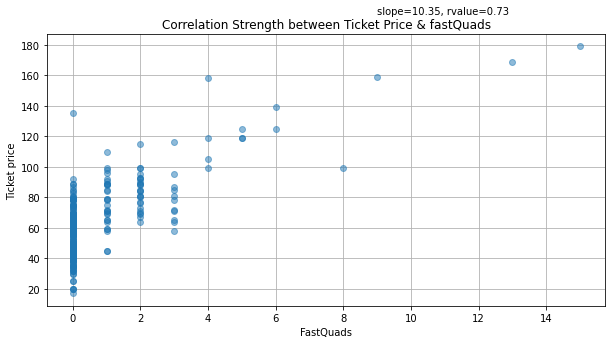

In [93]:
#Plot the Scatter Plot:
plt.figure(figsize=(10, 5))
plt.plot(xs_2, ys_2, 'o', alpha=0.5)
plt.grid(True)

#Plot the Line of best fit:
fx_2 = np.array([xs_2.min(), xs_2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2
plt.plot(fx_2, fy_2, 'r-', alpha=1)
plt.text(9, 200, "slope=10.35, rvalue=0.73")
plt.title('Correlation Strength between Ticket Price & fastQuads')
plt.xlabel('FastQuads')
plt.ylabel('Ticket price')